In [ ]:
# from google.colab import files
# adfile=files.upload()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

In [ ]:
df = pd.read_csv("insurance.csv")

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df['age'].unique()

array([19, 18, 28, 33, 32, 31, 46, 37, 60, 25, 62, 23, 56, 27, 52, 30, 34,
       59, 63, 55, 22, 26, 35, 24, 41, 38, 36, 21, 48, 40, 58, 53, 43, 64,
       20, 61, 44, 57, 29, 45, 54, 49, 47, 51, 42, 50, 39], dtype=int64)

In [ ]:
df['sex'].unique()

array(['female', 'male'], dtype=object)

In [ ]:
df['bmi'].unique()

array([27.9  , 33.77 , 33.   , 22.705, 28.88 , 25.74 , 33.44 , 27.74 ,
       29.83 , 25.84 , 26.22 , 26.29 , 34.4  , 39.82 , 42.13 , 24.6  ,
       30.78 , 23.845, 40.3  , 35.3  , 36.005, 32.4  , 34.1  , 31.92 ,
       28.025, 27.72 , 23.085, 32.775, 17.385, 36.3  , 35.6  , 26.315,
       28.6  , 28.31 , 36.4  , 20.425, 32.965, 20.8  , 36.67 , 39.9  ,
       26.6  , 36.63 , 21.78 , 30.8  , 37.05 , 37.3  , 38.665, 34.77 ,
       24.53 , 35.2  , 35.625, 33.63 , 28.   , 34.43 , 28.69 , 36.955,
       31.825, 31.68 , 22.88 , 37.335, 27.36 , 33.66 , 24.7  , 25.935,
       22.42 , 28.9  , 39.1  , 36.19 , 23.98 , 24.75 , 28.5  , 28.1  ,
       32.01 , 27.4  , 34.01 , 29.59 , 35.53 , 39.805, 26.885, 38.285,
       37.62 , 41.23 , 34.8  , 22.895, 31.16 , 27.2  , 26.98 , 39.49 ,
       24.795, 31.3  , 38.28 , 19.95 , 19.3  , 31.6  , 25.46 , 30.115,
       29.92 , 27.5  , 28.4  , 30.875, 27.94 , 35.09 , 29.7  , 35.72 ,
       32.205, 28.595, 49.06 , 27.17 , 23.37 , 37.1  , 23.75 , 28.975,
      

In [ ]:
df['children'].unique()

array([0, 1, 3, 2, 5, 4], dtype=int64)

In [ ]:
df['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [ ]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [ ]:
df['charges'].unique()

array([16884.924 ,  1725.5523,  4449.462 , ...,  1629.8335,  2007.945 ,
       29141.3603])

In [ ]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

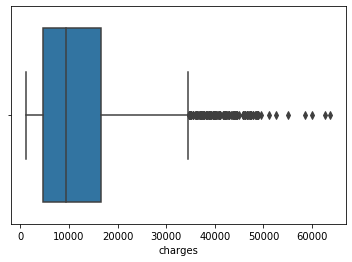

In [ ]:
sns.boxplot(data=df,x="charges")

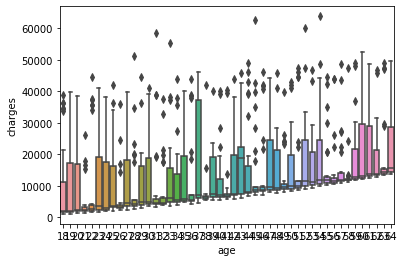

In [ ]:
sns.boxplot(data=df,y="charges",x="age")

In [ ]:
df_cat = df.select_dtypes(object)
df_num = df.select_dtypes(["int64", "float64"])

age : 0.055610083072599126


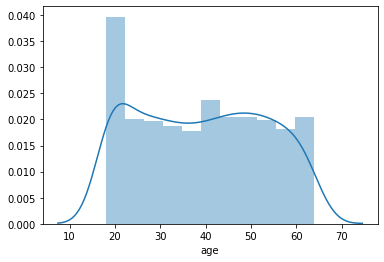

-------------------------------------------------------------
bmi : 0.28372857291709386


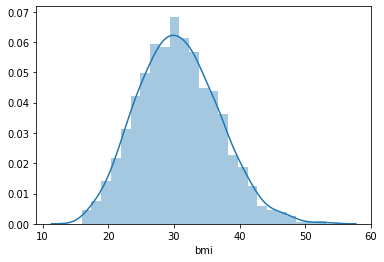

-------------------------------------------------------------
children : 0.9373281163874423


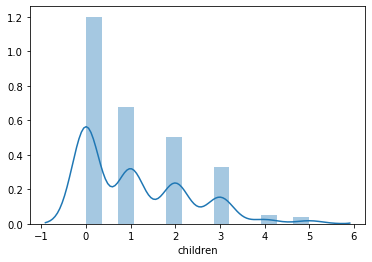

-------------------------------------------------------------
charges : 1.5141797118745743


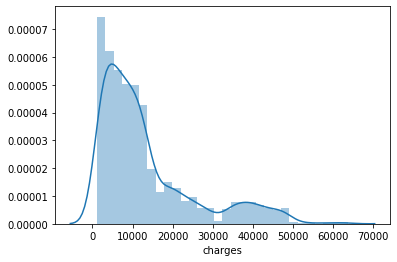

-------------------------------------------------------------


In [ ]:
for col in df_num:
    print(col,":", skew(df_num[col]))
    sns.distplot(df_num[col])
    plt.show()
    print("-------------------------------------------------------------")

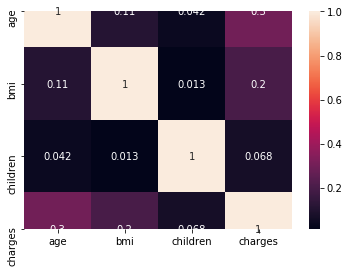

In [ ]:
sns.heatmap(df_num.corr(), annot=True)
plt.show()

In [ ]:
df['children'].min()

0

C:\Users\Mohit\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0.11621929554046424


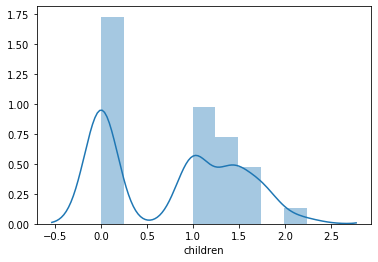

In [ ]:
df_num['children']=np.sqrt(df_num['children'])
print(skew(df_num['children']))
sns.distplot(df_num['children'])
plt.show()

In [ ]:
for col in df_cat:
    le = LabelEncoder()
    df_cat[col] = le.fit_transform(df_cat[col])
df_cat.head()

C:\Users\Mohit\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,sex,smoker,region
0,0,1,3
1,1,0,2
2,1,0,2
3,1,0,1
4,1,0,1


In [ ]:
df_new = pd.concat([df_num, df_cat], axis=1)
df_new.head()

,age,bmi,children,charges,sex,smoker,region
0,19,27.900,0.000000,16884.92400,0,1,3
1,18,33.770,1.000000,1725.55230,1,0,2
2,28,33.000,1.732051,4449.46200,1,0,2
3,33,22.705,0.000000,21984.47061,1,0,1
4,32,28.880,0.000000,3866.85520,1,0,1


In [ ]:
df_mm = df_new.copy()
df_ss = df_new.copy()

In [ ]:
for col in df_mm:
    mm = MinMaxScaler()
    df_mm[col] = mm.fit_transform(df_mm[[col]])
df_mm.head()

,age,bmi,children,charges,sex,smoker,region
0,0.021739,0.321227,0.000000,0.251611,0.0,1.0,1.000000
1,0.000000,0.479150,0.447214,0.009636,1.0,0.0,0.666667
2,0.217391,0.458434,0.774597,0.053115,1.0,0.0,0.666667
3,0.326087,0.181464,0.000000,0.333010,1.0,0.0,0.333333
4,0.304348,0.347592,0.000000,0.043816,1.0,0.0,0.333333


In [ ]:
for col in df_ss:
    ss = StandardScaler()
    df_ss[col] = ss.fit_transform(df_ss[[col]])
df_ss.head()

,age,bmi,children,charges,sex,smoker,region
0,-1.438764,-0.453320,-1.076101,0.298584,-1.010519,1.970587,1.343905
1,-1.509965,0.509621,0.327793,-0.953689,0.989591,-0.507463,0.438495
2,-0.797954,0.383307,1.355515,-0.728675,0.989591,-0.507463,0.438495
3,-0.441948,-1.305531,-1.076101,0.719843,0.989591,-0.507463,-0.466915
4,-0.513149,-0.292556,-1.076101,-0.776802,0.989591,-0.507463,-0.466915


In [ ]:
x=df_new.drop('charges',axis=1)
y=df_new['charges']
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=1)
lr=LinearRegression()
lr.fit(xtrain,ytrain)
yhat=lr.predict(xtest)
print("Slope=",lr.coef_)
print("Intercept=",lr.intercept_)
print("Mean squared error=",mean_squared_error(ytest,yhat))
print("r2_score=",r2_score(ytest,yhat))

Slope= [  251.98922081   316.3625472    525.94074388  -282.46064905
 24039.69746808  -315.10653386]
Intercept= -10946.157107591274
Mean squared error= 36747237.5334601
r2_score= 0.7406992644077104


In [ ]:
x=df_ss.drop('charges',axis=1)
y=df_ss['charges']
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=1)
lr=LinearRegression()
lr.fit(xtrain,ytrain)
yhat=lr.predict(xtest)
print("Slope=",lr.coef_)
print("Intercept=",lr.intercept_)
print("Mean squared error=",mean_squared_error(ytest,yhat))
print("r2_score=",r2_score(ytest,yhat))

Slope= [ 0.29235634  0.15930934  0.03094713 -0.011666    0.80137684 -0.02874947]
Intercept= 0.005755448578465401
Mean squared error= 0.250761183323764
r2_score= 0.7406992644077103


In [ ]:
x=df_mm.drop('charges',axis=1)
y=df_mm['charges']
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=1)
lr=LinearRegression()
lr.fit(xtrain,ytrain)
yhat=lr.predict(xtest)
print("Slope=",lr.coef_)
print("Intercept=",lr.intercept_)
print("Mean squared error=",mean_squared_error(ytest,yhat))
print("r2_score=",r2_score(ytest,yhat))

Slope= [ 0.18502429  0.18770099  0.01877201 -0.00450865  0.3837231  -0.01508925]
Intercept= -0.03963505327422848
Mean squared error= 0.009362731999676929
r2_score= 0.7406992644077104


In [ ]:
df_new.corr()

,age,bmi,children,charges,sex,smoker,region
age,1.000000,0.109272,0.048382,0.299008,-0.020856,-0.025019,0.002127
bmi,0.109272,1.000000,0.016052,0.198341,0.046371,0.003750,0.157566
children,0.048382,0.016052,1.000000,0.073913,0.016543,0.011814,0.014506
charges,0.299008,0.198341,0.073913,1.000000,0.057292,0.787251,-0.006208
sex,-0.020856,0.046371,0.016543,0.057292,1.000000,0.076185,0.004588
smoker,-0.025019,0.003750,0.011814,0.787251,0.076185,1.000000,-0.002181
region,0.002127,0.157566,0.014506,-0.006208,0.004588,-0.002181,1.000000


In [ ]:
x=df_new[["age","bmi","smoker"]]
y=df_new['charges']
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=1)
lr=LinearRegression()
lr.fit(xtrain,ytrain)
yhat=lr.predict(xtest)
print("Slope=",lr.coef_)
print("Intercept=",lr.intercept_)
print("Mean squared error=",mean_squared_error(ytest,yhat))
print("r2_score=",r2_score(ytest,yhat))

Slope= [  252.87592203   305.32380696 24022.19408021]
Intercept= -10861.910522447886
Mean squared error= 37560489.2268897
r2_score= 0.7349606898512976


In [ ]:
x=df_new[["age","bmi","smoker"]]
pf=PolynomialFeatures(2)
xpoly=pf.fit_transform(x)
y=df_new['charges']
xtrain,xtest,ytrain,ytest=train_test_split(xpoly,y,test_size=0.3,random_state=1)
lr=LinearRegression()
lr.fit(xtrain,ytrain)
yhat=lr.predict(xtest)
print("Slope=",lr.coef_)
print("Intercept=",lr.intercept_)
print("Mean squared error=",mean_squared_error(ytest,yhat))
print("r2_score=",r2_score(ytest,yhat))

Slope= [ 0.00000000e+00 -2.08163904e+01  4.21401620e+02 -9.51456132e+03
  2.35389843e+00  2.97964292e+00 -5.06088371e+00 -8.47526052e+00
  1.40619903e+03 -9.51456132e+03]
Intercept= -3111.067495135836
Mean squared error= 22557270.108736265
r2_score= 0.8408283962345908


In [ ]:
for i in range(2,21):
  x=df_new[["age","bmi","smoker"]]
  pf=PolynomialFeatures(i)
  xpoly=pf.fit_transform(x)
  y=df_new['charges']
  xtrain,xtest,ytrain,ytest=train_test_split(xpoly,y,test_size=0.3,random_state=1)
  lr=LinearRegression()
  lr.fit(xtrain,ytrain)
  yhat=lr.predict(xtest)
  print(i,"-:r2_score=",r2_score(ytest,yhat))

2 -:r2_score= 0.8408283962345908
3 -:r2_score= 0.8406861299948964
4 -:r2_score= 0.8471166958881342
5 -:r2_score= 0.8501072810113212
6 -:r2_score= 0.8522851564779843
7 -:r2_score= 0.8427995823545558
8 -:r2_score= 0.8087695429022665
9 -:r2_score= 0.8027768306290772
10 -:r2_score= -1.1576969026792678
11 -:r2_score= -1.8918668362920128
12 -:r2_score= -23.56174657192237
13 -:r2_score= -18.067260783197987
14 -:r2_score= -39.74620245028263
15 -:r2_score= -9.341465430714546
16 -:r2_score= -9.564973302111989
17 -:r2_score= -44.79164680293219
18 -:r2_score= -26.505823595067554
19 -:r2_score= -40.98831633142697
20 -:r2_score= -393.40726241751133


In [ ]:
x=df_new[["age","bmi","smoker"]]
pf=PolynomialFeatures(6)
xpoly=pf.fit_transform(x)
y=df_new['charges']
xtrain,xtest,ytrain,ytest=train_test_split(xpoly,y,test_size=0.3,random_state=1)
lr=LinearRegression()
lr.fit(xtrain,ytrain)
yhat=lr.predict(xtest)
print("Slope=",lr.coef_)
print("Intercept=",lr.intercept_)
print("Mean squared error=",mean_squared_error(ytest,yhat))
print("r2_score=",r2_score(ytest,yhat))

Slope= [-8.80695187e-01  5.38175076e+04  1.13999192e+05 -1.21944775e+05
 -3.37367653e+03 -2.63486254e+02  1.52187733e+03 -9.66485492e+03
  2.91480534e+04 -1.21945930e+05  5.61925841e+01  2.17629596e+02
 -3.89884740e+01 -2.50553758e+02 -2.61710378e+02  1.52168099e+03
  5.32957141e+02 -2.68595159e+03  2.91479764e+04 -1.21945830e+05
 -2.01271221e-01 -4.35742529e+00  5.48079658e+00 -2.05216435e+00
 -1.17153765e+01 -3.94939701e+01  9.47153188e+00  3.34762603e+01
 -2.61733725e+02  1.52180486e+03 -1.57959158e+01  1.19565671e+02
 -2.68595406e+03  2.91479782e+04 -1.21945829e+05 -4.00322675e-03
  3.93922293e-02 -1.59478290e-01  3.87361406e-02  2.05467468e-01
  5.48249892e+00 -1.11304915e-02  1.63703142e-01 -1.17148277e+01
 -3.94895852e+01 -1.35130425e-01 -1.24852492e+00  3.34765057e+01
 -2.61733730e+02  1.52180476e+03  2.30843493e-01 -2.80761555e+00
  1.19566321e+02 -2.68595318e+03  2.91479782e+04 -1.21945829e+05
  3.89999768e-05 -1.94345121e-04  2.10444821e-03  1.07708038e-05
 -2.82319528e-03 -

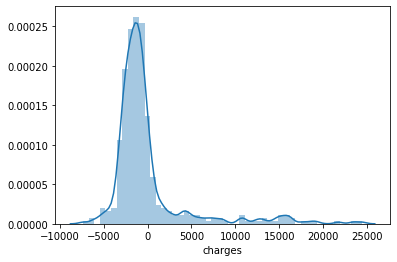

In [ ]:
residuals=ytest-yhat
sns.distplot(residuals)
plt.show()

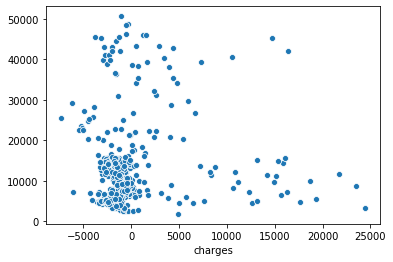

In [ ]:
sns.scatterplot(residuals,yhat)
plt.show()

[1.80419982e+10] [-3.43173531e+08 -9.61287201e+07 -1.62811669e+08 -2.71463340e+09]
R2 = -0.06269123299337886


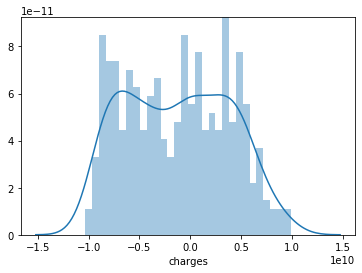

In [ ]:
from sklearn.linear_model import SGDRegressor
sgd = SGDRegressor()
x_train, x_test, y_train, y_test = train_test_split(
    df_new[["age", "bmi", "children","smoker"]], df_new['charges'], 
    test_size=0.3)
sgd.fit(x_train, y_train)
print(sgd.intercept_, sgd.coef_)
y_hat = sgd.predict(x_test)
print("R2 =" , r2_score(y_hat, y_test))
residuals=y_test-y_hat
sns.distplot(residuals,bins=30)